<h2 align='center'>🧠 Intro to Deep Learning 0 - Simple Neurons and Networks</h2>
<br />
<i><center>Learn to create simple Neurons and Networks using TensorFlow Keras</center></i>

----

Suppose you are working for <i>Google</i> and you have to create a simple Deep Learning model that must calculate the number of `calories` a food contains given its `sugars`, `fiber` and `protein`, so:

> Inputs: 

```
\ sugars
\ fiber
\ protein
```

> Output: 

```
\ calories
```

For this, you have chosen to work with `TensorFlow Keras`!

----

In [2]:
# pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

The code above imports `Keras library` that's present as a submodule inside `TensorFlow library`. After that, a model is created using the `Sequential` logic for the layers.

A sequential model processes the inputs in each layer in sequential way, that is, processes in the first layer, after that processes in the second and so on untill the output layer.

In this example, our model has just a `Dense` layer that receives two parameters:

> **units** - number of outputs generated by the layer;

> **input_shape** - number of inputs.

----

The `input_shape` is a list as far as we usually work with tabular data, such as pandas dataframes, allowing us to work with more complex datasets. For instance, when working with Computer Vision, the input shape will probably receive three elements: [`height`, `width` and `color channels`].

----

Now, let's take a look at the `weights` and `bias` of our model.

In [3]:
weights, bias = model.weights

print(f'Weights: {weights}')
print()
print(f'Bias: {bias}')

Weights: <tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[0.6096221 ],
       [1.0777918 ],
       [0.72769976]], dtype=float32)>

Bias: <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


`Weights` consist in an array of float numbers. Each number is designed for one input, so, as our model receives three inputs in the Dense layer, our model has three weights. Also, when a model is created, the weights are random numbers initially and, after the traning step, the weights are improved to the best match.

`Bias` is a number that helps the activation function triggers the result or not. When a model is created, the bias is equals zero initially and, after the training step, its value are adjusted to the best match like the weights.

----

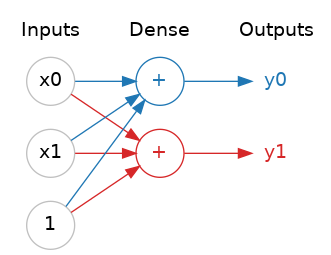

Take a look at the image above, what you gotta have in mind when looking at Deep Learning Diagram Models is their components, such as, for this image:

```
- two inputs (`x0` and `x1`);

- a bias (`1`);

- a dense layer with two neurons (`+` and `+`);

- and two outputs generated by the dense layer (`y0` and `y1`).
```

So, transforming the diagram into a Keras model, it looks like this:

In [13]:
new_model = keras.Sequential([
    layers.Dense(units=2, input_shape=[2])
])

weights, bias = new_model.weights

print(f'Weights: {weights[0]}')
print(f'Bias: {bias.read_value()}')

Weights: [-0.94052076 -0.69879276]
Bias: [0. 0.]


----

Now, let's go deeper!!

If you read again above the bias explanation, we will see that the bias helps the `Activation Function` to trigger or not the result. Activation Functions are functions that each neuron has and when the result is triggered, the output is generated and assigned as input to the next layer; however, when the result is not triggered, the output is not generated, the next layer is not called and the process is stopped for this input. Then:

> ✔️ Activation Function Triggers >> output generated >> output is assigned as input to the next layer

> ❌ Activation Function Doesn't Triggeer >> output is not generated >> next layer is not called

----

Let's take a look at `ReLU` Activation Function, the simplest one:

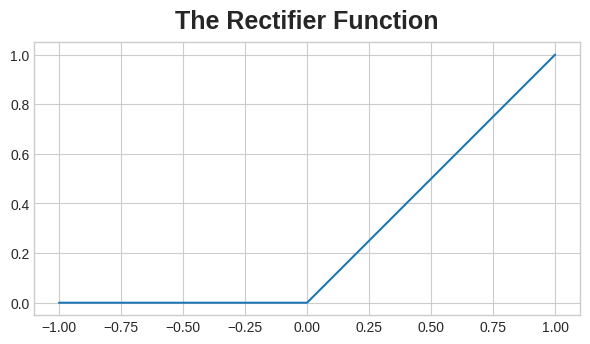

The image above tells us that the Activation Function just triggers when the output is greather than zero, else, the output is not generated and the next layer is not called!

----

Now, let's do another exercise to convert a Deep Learning Diagram Model into code, but now, assigning ReLU as Activation Function to the neuron.

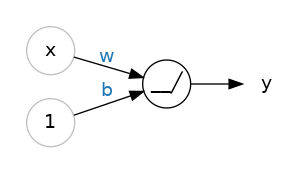

```
- one input;

- a bias;

- one dense layer with a neuron and one output;

- ReLU as Activation Function to the neuron.
```

In [14]:
model_with_activation_function = keras.Sequential([
    layers.Dense(
        units=1
        , input_shape=[1]
        , activation='relu'
    )
])

Let's go even deeper and tell that we can `Stack Layers`, that is, add more layers to our model like the diagram bellow:

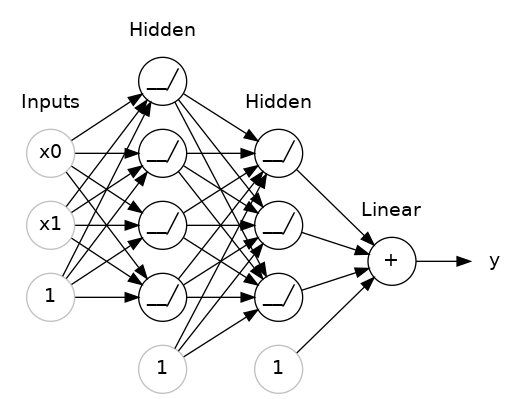

Some observations about the image:

```
- the linear Activation Function in the last layer is the common Keras.Dense() without assigning any Activation Function to it, because the Linear function is the default one;

- all the layers before the last one (the linear one) are called `Hidden Layers` because their outputs are not the final result;

- the `input_shape` property should be assigned just to the first layer due to the model ability to find out the number of inputs to the next layer based by the results from the previous one.
```

In [15]:
stacked_model = keras.Sequential([
    # hidden layers
    layers.Dense(units=4, input_shape=[2], activation='relu')
    , layers.Dense(units=3, activation='relu')
    
    # output layer
    , layers.Dense(units=1)
])